In [5]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
import Levenshtein as Lv

In [6]:
data = pd.read_csv('Account_ii.csv',skiprows=2,low_memory=False)

In [7]:
data

,Account name,Customer ID,Keyword ID,Campaign ID,Ad ID,Search keyword,Search term,Search keyword status,Campaign end date,Campaign start date,...,Converted currency code,Avg. CPC (Converted currency),Cost,Cost (Converted currency),Impr. (Abs. Top) %,Impr. (Top) %,Avg. CPM,Avg. CPM (Converted currency),Conversions,Conv. value
0,HealthCare.org U65,265-940-7128,14619001,14578287535,575130202304,health,aventa health,Not eligible,"Dec 31, 2037","Sep 9, 2021",...,USD,--,0.0,0.0,0.00%,100.00%,0.0,0.0,0.0,0.00
1,HealthCare.org U65,265-940-7128,14619001,14578287535,558078975278,health,southern california of health sciences,Not eligible,"Dec 31, 2037","Sep 9, 2021",...,USD,--,0.0,0.0,0.00%,100.00%,0.0,0.0,0.0,0.00
2,HealthCare.org U65,265-940-7128,14619001,14578287535,558078975278,health,yorktown health,Not eligible,"Dec 31, 2037","Sep 9, 2021",...,USD,--,0.0,0.0,50.00%,100.00%,0.0,0.0,0.0,0.00
3,HealthCare.org U65,265-940-7128,14619001,14578287535,558078975278,health,truvision health,Not eligible,"Dec 31, 2037","Sep 9, 2021",...,USD,--,0.0,0.0,66.67%,100.00%,0.0,0.0,0.0,0.00
4,HealthCare.org U65,265-940-7128,14619001,14578287535,575130202304,health,cano health care,Not eligible,"Dec 31, 2037","Sep 9, 2021",...,USD,--,0.0,0.0,0.00%,100.00%,0.0,0.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24821466,HealthCare.com U65,476-322-7661,34830920,12912640705,519237557685,dental,sexton dental clinic price list,Not eligible,"Dec 31, 2037","Apr 30, 2021",...,USD,--,0.0,0.0,0.00%,0.00%,0.0,0.0,0.0,0.00
24821467,HealthCare.com U65,476-322-7661,34830920,12912640705,519237557685,dental,quincy dental clinic,Not eligible,"Dec 31, 2037","Apr 30, 2021",...,USD,--,0.0,0.0,0.00%,100.00%,0.0,0.0,0.0,0.00
24821468,HealthCare.com U65,476-322-7661,34830920,12912640705,519237557685,dental,comenity dental financing,Not eligible,"Dec 31, 2037","Apr 30, 2021",...,USD,--,0.0,0.0,0,0,0.0,0.0,0.0,0.00
24821469,HealthCare.org U65,265-940-7128,10297731,14579768141,544841020275,healthcare,raleigh rex hospital,Not eligible,"Dec 31, 2037","Sep 9, 2021",...,USD,--,0.0,0.0,100.00%,100.00%,0.0,0.0,0.0,0.00


In [8]:
# ,skiprows=2,low_memory=False

In [9]:
data[['Search term','Search keyword','Cost','Conversions','Keyword ID']].sort_values(by='Conversions', ascending=False)

,Search term,Search keyword,Cost,Conversions,Keyword ID
10777549,delta dental,delta dental,13802.73,849.40,29842651
9966491,delta dental,delta dental,12456.63,831.67,29842651
11692471,delta dental,delta dental,12289.44,825.15,29842651
16633863,delta dental,delta dental,12134.42,786.98,29842651
11275686,delta dental,delta dental,11470.05,780.06,29842651
...,...,...,...,...,...
8350736,blue cross student health insurance,health insurance student,0.00,0.00,23698043
8350735,how to end medicaid coverage,health insurance marketplace,0.00,0.00,430243298
8350734,does molina marketplace cover dental,healthcare marketplace dental plans,0.00,0.00,337152871829
8350733,how to change your hmo for medicaid nj,health insurance marketplace,0.00,0.00,430243298


In [10]:
data.dtypes

Account name                      object
Customer ID                       object
Keyword ID                         int64
Campaign ID                        int64
Ad ID                              int64
Search keyword                    object
Search term                       object
Search keyword status             object
Campaign end date                 object
Campaign start date               object
Campaign                          object
Search keyword match type         object
Search terms match type           object
Campaign type                     object
Campaign state                    object
Day of the week                   object
Currency code                     object
Clicks                            object
Impr.                             object
CTR                               object
Avg. CPC                          object
Converted currency code           object
Avg. CPC (Converted currency)     object
Cost                             float64
Cost (Converted 

In [11]:
data.Conversions.max()

849.4

In [12]:
data['Conv. value'].max()

'999.90'

In [13]:
data.Conversions.value_counts().tail(50)

253.95    1
132.11    1
188.07    1
7.80      1
97.50     1
15.58     1
6.92      1
8.07      1
93.83     1
14.88     1
83.00     1
129.37    1
31.23     1
36.31     1
74.27     1
73.98     1
99.00     1
34.87     1
140.49    1
77.50     1
74.14     1
82.59     1
505.07    1
244.98    1
26.08     1
16.12     1
7.11      1
13.58     1
24.70     1
26.81     1
12.20     1
375.66    1
223.83    1
261.33    1
52.55     1
7.22      1
167.34    1
205.11    1
220.17    1
34.75     1
22.26     1
4.47      1
4.35      1
335.77    1
314.42    1
68.17     1
95.87     1
2.61      1
87.00     1
9.06      1
Name: Conversions, dtype: int64

In [14]:
data.Conversions.sort_values()

0             0.00
16482015      0.00
16482014      0.00
16482013      0.00
16482012      0.00
             ...  
11275686    780.06
16633863    786.98
11692471    825.15
9966491     831.67
10777549    849.40
Name: Conversions, Length: 24821471, dtype: float64

In [15]:
data['Conv. value'].sort_values()

0             0.00
16484325      0.00
16484324      0.00
16484323      0.00
16484322      0.00
             ...  
12141651    999.03
10452846    999.07
11593664    999.19
23304949    999.87
7909901     999.90
Name: Conv. value, Length: 24821471, dtype: object

In [16]:
data['Conv. value'].value_counts().head(50)

0.00     24396698
35.00       13764
8.00         7367
10.00        7307
50.00        6680
4.00         6679
60.50        5924
20.00        5846
3.00         5567
12.50        4835
21.50        4294
40.00        4280
5.00         4173
45.00        3956
15.00        3893
25.00        3619
30.00        3474
45.50        3347
24.00        3083
55.00        3053
70.00        2986
65.00        2960
7.50         2832
7.75         2791
3.50         2414
6.00         2390
14.00        2223
7.00         2117
8.57         1897
65.52        1849
12.00        1814
9.51         1800
33.00        1736
2.00         1637
37.00        1578
2.50         1501
7.51         1480
60.00        1431
19.00        1308
3.80         1285
2.01         1256
18.00        1075
17.50        1053
5.50          988
3.01          950
47.00         948
4.55          837
24.01         836
6.75          825
9.00          819
Name: Conv. value, dtype: int64

In [17]:
data['Conv_val'] = pd.to_numeric(data['Conv. value'].str.replace(',',''))

In [18]:
data['Conv_val']

0           0.0
1           0.0
2           0.0
3           0.0
4           0.0
           ... 
24821466    0.0
24821467    0.0
24821468    0.0
24821469    0.0
24821470    0.0
Name: Conv_val, Length: 24821471, dtype: float64

In [19]:
data['Conv_val'].max()

38305.74

In [20]:
data.loc[data['Conv_val']>=100]

,Account name,Customer ID,Keyword ID,Campaign ID,Ad ID,Search keyword,Search term,Search keyword status,Campaign end date,Campaign start date,...,Avg. CPC (Converted currency),Cost,Cost (Converted currency),Impr. (Abs. Top) %,Impr. (Top) %,Avg. CPM,Avg. CPM (Converted currency),Conversions,Conv. value,Conv_val
4949,HealthCare.com U65,476-322-7661,61751516972,12913277519,532428285572,healthcare marketplace phone number,healthcare marketplace phone number,Not eligible,"Dec 31, 2037","Apr 30, 2021",...,8.48,1594.81,1594.81,32.05%,91.89%,1534.95,1534.95,77.17,"2,055.23",2055.23
5264,HealthCare.com O65,120-348-7028,96002256,17318156841,600445072247,www ssa gov,www ssa gov,Eligible,"Dec 31, 2037","May 24, 2022",...,5.30,116.52,116.52,51.28%,84.92%,229.37,229.37,2.00,123.00,123.00
5777,HealthCare.com O65,120-348-7028,27793000,15240229421,561132430301,social security,www socialsecurity gov setup,Not eligible,"Dec 31, 2037","Nov 11, 2021",...,5.77,74.99,74.99,83.01%,99.35%,486.95,486.95,3.00,280.08,280.08
7939,HealthCare.com O65,120-348-7028,27793000,15240229421,561132430301,social security,social security administration,Not eligible,"Dec 31, 2037","Nov 11, 2021",...,7.81,39.06,39.06,48.72%,93.59%,470.60,470.60,3.33,103.65,103.65
8480,HealthCare.com O65,120-348-7028,27793000,15240229421,561132430301,social security,social security online services,Not eligible,"Dec 31, 2037","Nov 11, 2021",...,4.67,70.09,70.09,63.04%,92.75%,473.58,473.58,4.33,117.02,117.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24814618,HealthCare.com U65,476-322-7661,34830920,12912639787,519292619191,dental,ameritas dental,Not eligible,"Dec 31, 2037","Apr 30, 2021",...,2.11,40.10,40.10,21.40%,94.46%,139.24,139.24,4.00,155.00,155.00
24815468,HealthCare.com O65,120-348-7028,312775996282,14493769137,552781122852,social security medicaid,social security medicaid,Not eligible,"Dec 31, 2037","Sep 2, 2021",...,3.98,39.84,39.84,30.36%,91.07%,711.43,711.43,5.50,168.77,168.77
24815707,HealthCare.com U65,476-322-7661,34830920,12912640705,519237557685,dental,full set of dental implants price,Not eligible,"Dec 31, 2037","Apr 30, 2021",...,1.74,151.60,151.60,0,0,151.15,151.15,9.00,200.23,200.23
24816972,HealthCare.com U65,476-322-7661,112048292,13613581861,529227050332,medicaid,medicaid maryland,Not eligible,"Dec 31, 2037","Jun 22, 2021",...,3.57,49.95,49.95,9.74%,92.34%,115.36,115.36,9.00,130.22,130.22


In [21]:
data.loc[data['Conversions']>=100]

,Account name,Customer ID,Keyword ID,Campaign ID,Ad ID,Search keyword,Search term,Search keyword status,Campaign end date,Campaign start date,...,Avg. CPC (Converted currency),Cost,Cost (Converted currency),Impr. (Abs. Top) %,Impr. (Top) %,Avg. CPM,Avg. CPM (Converted currency),Conversions,Conv. value,Conv_val
20536,HealthCare.com U65,476-322-7661,61751516972,12913277519,532428285572,healthcare marketplace phone number,healthcare marketplace phone number,Not eligible,"Dec 31, 2037","Apr 30, 2021",...,9.99,3148.25,3148.25,33.53%,92.41%,2023.30,2023.30,132.50,"4,958.43",4958.43
204853,HealthCare.com U65,476-322-7661,28786830,12913278236,519256619688,kaiser permanente,kaiser permanente,Eligible,"Dec 31, 2037","Apr 30, 2021",...,1.82,2683.52,2683.52,23.42%,93.87%,74.41,74.41,257.83,"3,830.90",3830.90
208516,HealthCare.com U65,476-322-7661,11351851,12913277519,518267235345,marketplace,marketplace,Not eligible,"Dec 31, 2037","Apr 30, 2021",...,2.65,1637.90,1637.90,35.89%,96.93%,248.28,248.28,108.50,"1,704.55",1704.55
231767,HealthCare.com U65,476-322-7661,28786830,12913278236,519256619688,kaiser permanente,kaiser permanente,Eligible,"Dec 31, 2037","Apr 30, 2021",...,1.81,3093.41,3093.41,23.64%,95.03%,74.59,74.59,242.66,"3,209.12",3209.12
380416,HealthCare.com U65,476-322-7661,28786830,12913278236,519256619688,kaiser permanente,kaiser permanente,Eligible,"Dec 31, 2037","Apr 30, 2021",...,1.81,2410.64,2410.64,23.15%,93.62%,74.75,74.75,246.16,"3,350.96",3350.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24427344,HealthCare.com U65,476-322-7661,298598353113,12912520932,518379193163,ambetter,ambetter,Not eligible,"Dec 31, 2037","Apr 30, 2021",...,2.87,9396.22,9396.22,32.46%,98.54%,277.12,277.12,498.00,"12,170.44",12170.44
24427492,HealthCare.com U65,476-322-7661,298598353113,12912520932,518379193163,ambetter,ambetter,Not eligible,"Dec 31, 2037","Apr 30, 2021",...,2.68,10772.32,10772.32,36.35%,98.58%,278.30,278.30,557.33,"12,105.53",12105.53
24529547,HealthCare.com U65,476-322-7661,298598353113,12912520932,518379193163,ambetter,ambetter,Not eligible,"Dec 31, 2037","Apr 30, 2021",...,1.79,1400.72,1400.72,20.84%,98.05%,125.66,125.66,139.25,"1,925.93",1925.93
24613872,HealthCare.com U65,476-322-7661,298598353113,12912520932,518379193163,ambetter,ambetter,Not eligible,"Dec 31, 2037","Apr 30, 2021",...,2.53,6236.40,6236.40,33.62%,98.69%,239.48,239.48,357.09,"9,071.39",9071.39


In [22]:
data.Cost.sum()

18717424.309999984

In [23]:
data['LV_distance'] = data.apply(lambda x: Lv.distance(x['Search term'],  x['Search keyword']), axis=1)

In [24]:
data[['LV_distance','Conversions']].sort_values(by='Conversions', ascending= False)

,LV_distance,Conversions
10777549,0,849.40
9966491,0,831.67
11692471,0,825.15
16633863,0,786.98
11275686,0,780.06
...,...,...
8350736,27,0.00
8350735,22,0.00
8350734,22,0.00
8350733,28,0.00


In [25]:
data['Search keyword status'].value_counts()

Not eligible    18199512
Eligible         4488056
Removed          1059262
Paused            950430
Limited           124211
Name: Search keyword status, dtype: int64

In [26]:
data.loc[data['Search keyword status']=='Eligible']

,Account name,Customer ID,Keyword ID,Campaign ID,Ad ID,Search keyword,Search term,Search keyword status,Campaign end date,Campaign start date,...,Cost,Cost (Converted currency),Impr. (Abs. Top) %,Impr. (Top) %,Avg. CPM,Avg. CPM (Converted currency),Conversions,Conv. value,Conv_val,LV_distance
14,HealthCare.com U65,476-322-7661,100750062,12913277510,519311697487,healthcare com,carefirst,Eligible,"Dec 31, 2037","Apr 30, 2021",...,0.00,0.00,0.00%,0.00%,0.0,0.0,0.0,0.00,0.0,11
53,HealthCare.com U65,476-322-7661,100750062,12913277510,518316224044,healthcare com,health insurance for age 64,Eligible,"Dec 31, 2037","Apr 30, 2021",...,0.00,0.00,100.00%,100.00%,0.0,0.0,0.0,0.00,0.0,17
54,HealthCare.com U65,476-322-7661,100750062,12913277510,518316224044,healthcare com,clear spring health premier rx,Eligible,"Dec 31, 2037","Apr 30, 2021",...,0.00,0.00,50.00%,100.00%,0.0,0.0,0.0,0.00,0.0,22
59,HealthCare.com U65,476-322-7661,264379747,17303234384,603051373634,short term health insurance plan,best insurance for chiropractic care,Eligible,"Dec 31, 2037","May 18, 2022",...,0.00,0.00,100.00%,100.00%,0.0,0.0,0.0,0.00,0.0,28
67,HealthCare.com U65,476-322-7661,100750062,12913277510,518316224044,healthcare com,gohealth,Eligible,"Dec 31, 2037","Apr 30, 2021",...,0.00,0.00,0.00%,0.00%,0.0,0.0,0.0,0.00,0.0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24821379,HealthCare.com U65,476-322-7661,389399860475,12912520245,519291930373,ambetter bronze plan,ambetter bronze plans,Eligible,"Dec 31, 2037","Apr 30, 2021",...,0.61,0.61,0.00%,100.00%,610.0,610.0,0.0,0.00,0.0,1
24821449,HealthCare.com U65,476-322-7661,14619001,12912639787,519292619920,health,south side health center,Eligible,"Dec 31, 2037","Apr 30, 2021",...,0.00,0.00,100.00%,100.00%,0.0,0.0,0.0,0.00,0.0,18
24821450,HealthCare.com U65,476-322-7661,14619001,12912639787,519292619920,health,san ysidro health otay,Eligible,"Dec 31, 2037","Apr 30, 2021",...,0.00,0.00,0,0,0.0,0.0,0.0,0.00,0.0,16
24821451,HealthCare.com U65,476-322-7661,14619001,12912639787,519292619920,health,meridian health customer service phone number,Eligible,"Dec 31, 2037","Apr 30, 2021",...,0.00,0.00,50.00%,50.00%,0.0,0.0,0.0,0.00,0.0,39


In [27]:
data['Search keyword match type'].value_counts()

Broad match     12812223
Phrase match     8149041
Exact match      3860207
Name: Search keyword match type, dtype: int64

In [28]:
data['Search terms match type'].value_counts()

Broad match                     10631354
Phrase match (close variant)     6283891
Phrase match                     3490751
Exact match (close variant)      3234636
Exact match                      1180839
Name: Search terms match type, dtype: int64

In [29]:
data['Search keyword status'].value_counts()

Not eligible    18199512
Eligible         4488056
Removed          1059262
Paused            950430
Limited           124211
Name: Search keyword status, dtype: int64

In [30]:
data.loc[data['Search keyword status']=='Eligible'].Cost.sum()

4474665.409999999

In [31]:
data.loc[data['Search keyword status']=='Not Eligible'].Cost.sum()

0.0

In [32]:
data.loc[data['Search keyword status']=='Paused'].Cost.sum()

369531.1699999998

In [33]:
data.loc[data['Search keyword status']=='Removed'].Cost.sum()

417976.51999999996

In [34]:
data.loc[data['Search keyword status']=='Limited'].Cost.sum()

79896.79000000001

In [35]:
data[['Search term','Search keyword','Cost','Conversions','Keyword ID','Search keyword match type','LV_distance','Search terms match type']].sort_values(by='LV_distance', ascending=False)

,Search term,Search keyword,Cost,Conversions,Keyword ID,Search keyword match type,LV_distance,Search terms match type
23066433,why are the premiums for a ppo health insuranc...,ppo,0.00,0.0,128929739,Phrase match,125,Phrase match
1150519,under the affordable care act which of the fol...,aca,0.00,0.0,100032174,Phrase match,125,Phrase match (close variant)
18081921,does the patient protection and affordable car...,aca,0.00,0.0,100032174,Phrase match,125,Phrase match (close variant)
7095081,member doug enrolled in a health maintenance o...,hmo,0.00,0.0,17180442,Phrase match,125,Phrase match
17357333,the patient protection and affordable care act...,aca,0.00,0.0,100032174,Phrase match,125,Phrase match
...,...,...,...,...,...,...,...,...
6697622,what is medicare a and b,what is medicare a and b,0.00,0.0,323486218074,Exact match,0,Exact match
6697618,anthem dental plans,anthem dental plans,29.75,2.0,1197695004,Exact match,0,Exact match
6697617,aetna ppo plan,aetna ppo plan,0.00,0.0,299698130289,Exact match,0,Exact match
4044840,health insurance usa,health insurance usa,0.00,0.0,35844101,Exact match,0,Exact match


In [36]:
data[['Search term','Search keyword','Cost','Conversions','Keyword ID','Search keyword match type','LV_distance','Search terms match type']].sort_values(by='LV_distance', ascending=True)

,Search term,Search keyword,Cost,Conversions,Keyword ID,Search keyword match type,LV_distance,Search terms match type
7954405,health plan,health plan,2.31,0.0,11296671,Exact match,0,Exact match
20379852,the market health insurance,the market health insurance,0.00,0.0,355451889538,Exact match,0,Exact match
844112,insurance marketplace,insurance marketplace,0.00,0.0,99466583,Exact match,0,Exact match
7931398,well care michigan,well care michigan,1.48,0.0,1210161943347,Exact match,0,Exact match
844110,ehealth medicare part d,ehealth medicare part d,0.00,0.0,423152552607,Exact match,0,Exact match
...,...,...,...,...,...,...,...,...
14510093,under the patient protection and affordable ca...,aca,0.00,0.0,100032174,Phrase match,125,Phrase match (close variant)
23066433,why are the premiums for a ppo health insuranc...,ppo,0.00,0.0,128929739,Phrase match,125,Phrase match
24587141,the web site healthcare gov was launched on oc...,aca,0.00,0.0,16730541,Broad match,125,Phrase match (close variant)
10256814,if casey's insurance was an hmo capitation pla...,hmo,0.00,0.0,17180442,Phrase match,125,Phrase match


In [37]:
# 12812223 + 8149041 + 3860207

In [38]:
# 10631354 + 6283891 + 3490751 + 3234636 + 1180839

In [39]:
# data.plot.scatter(x='Conversions',y='LV_distance',colormap='viridis',figsize=(40,40))

In [65]:
# data.plot.scatter(x='Conversions',y='LV_distance',colormap='viridis',figsize=(40,40), color='Search keyword match type')

In [66]:
# data.plot.scatter(x='Conversions',y='LV_distance',colormap='viridis',figsize=(40,40), color='Search terms match type')

In [67]:
# data.plot.scatter(x='Conversions',y='LV_distance',colormap='viridis',figsize=(40,40), color='Search keyword status')

## Test 1

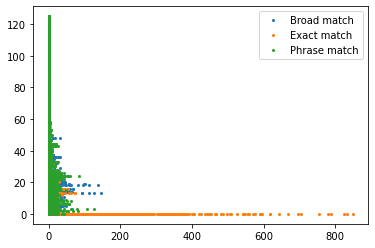

In [77]:
import matplotlib.pyplot as plt

groups = data.groupby('Search keyword match type')
for name, group in groups:
    plt.plot(group.Conversions, group.LV_distance, marker='o', linestyle='', markersize=2, label=name)
plt.legend()

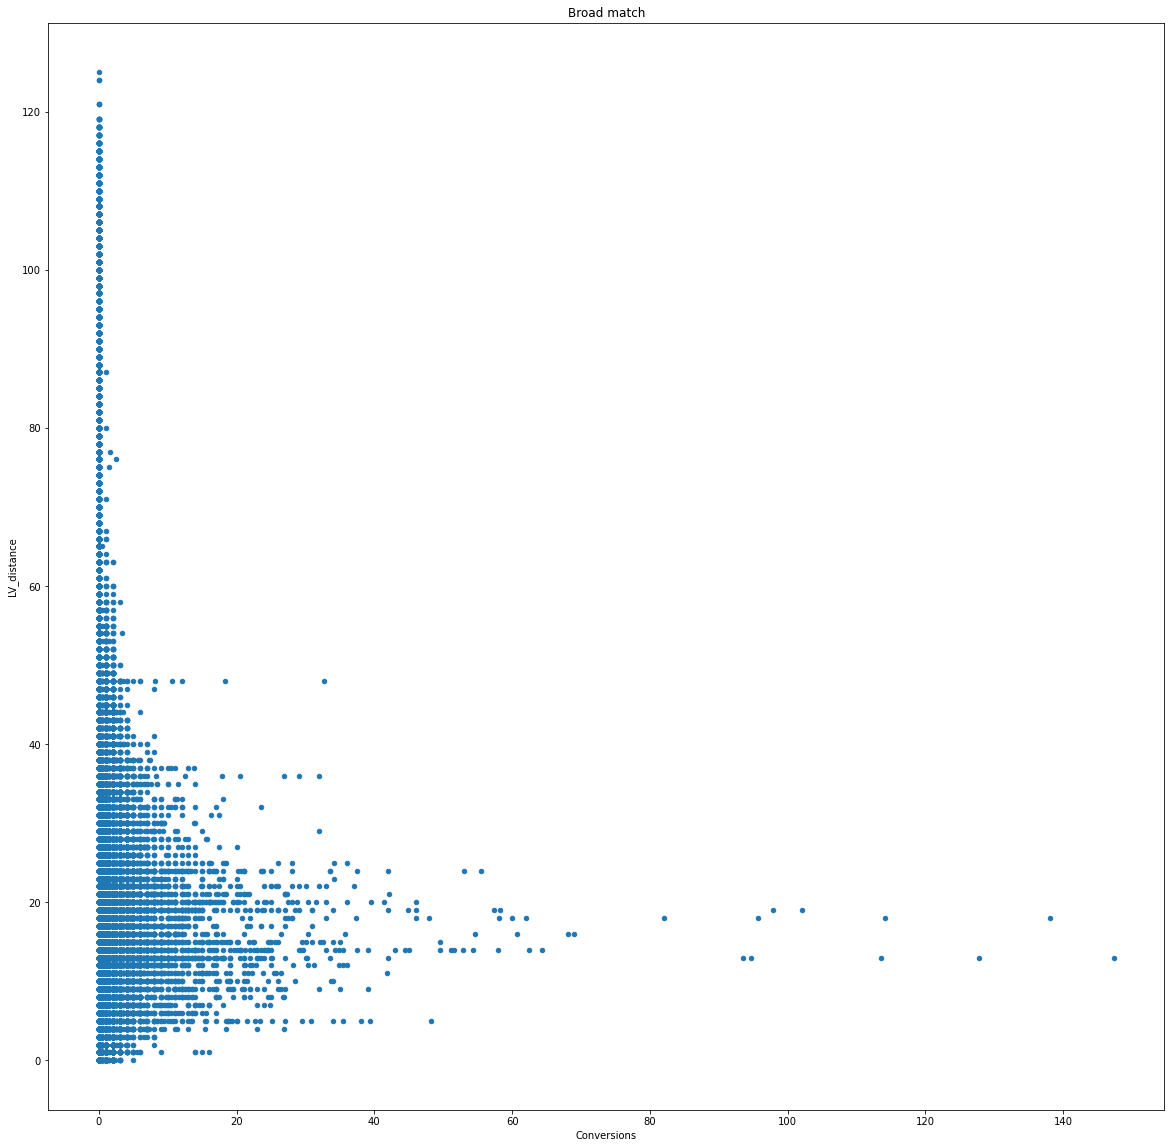

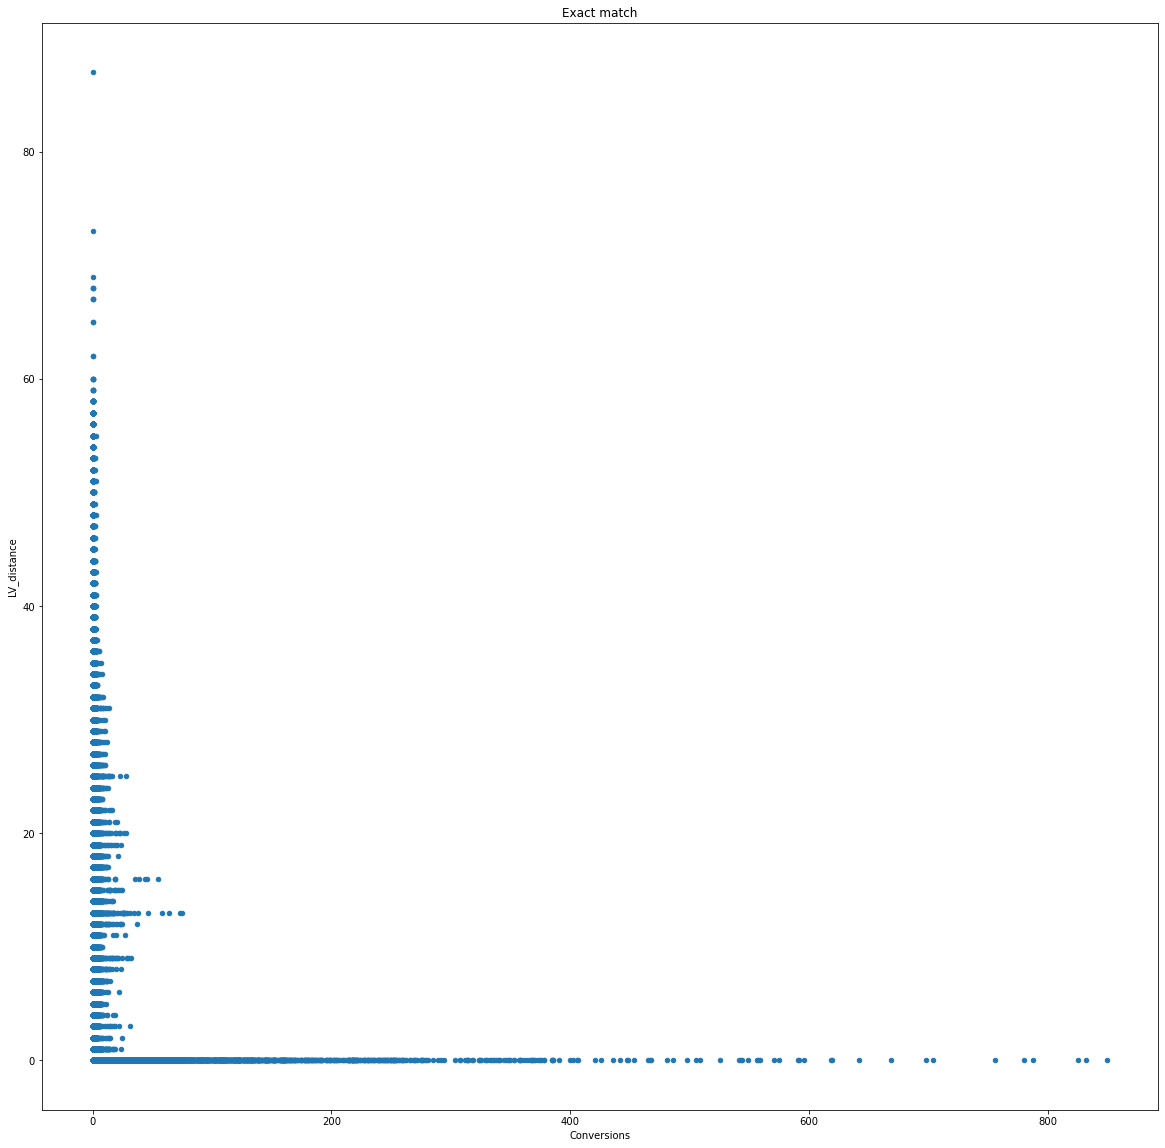

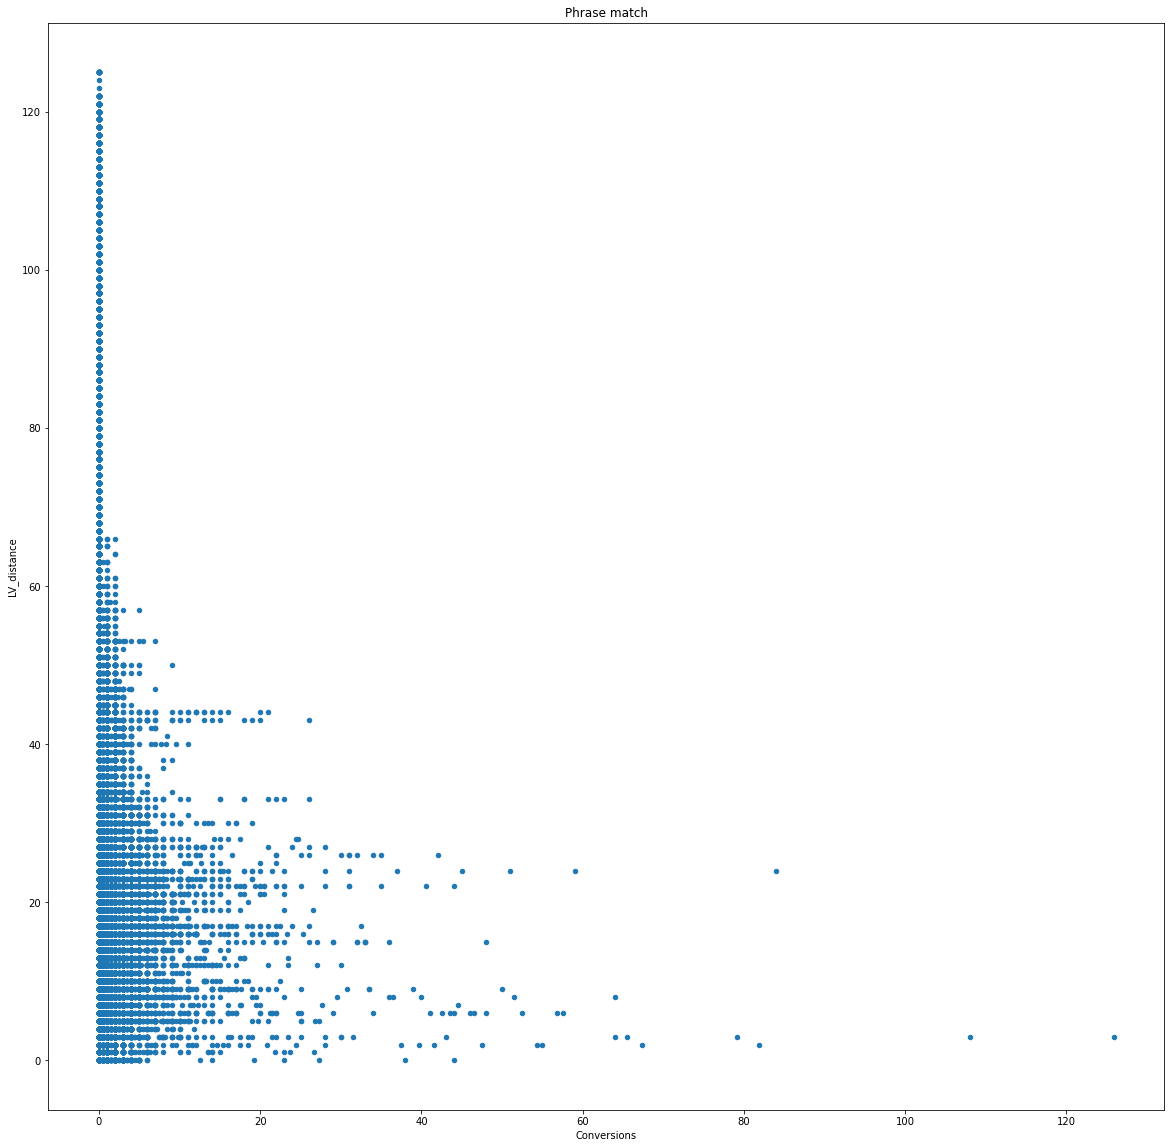

In [80]:
for name, group in groups:
    # print(name)
    group.plot.scatter(x='Conversions',y='LV_distance',colormap='viridis',figsize=(20,20),title=name)

In [ ]:
# plt.plot(group.Conversions, group.LV_distance, marker='o', linestyle='', markersize=2, label=name)

In [4]:
import matplotlib.pyplot as plt

groups = data.groupby('Search terms match type')
for name, group in groups:
    plt.plot(group.Conversions, group.LV_distance, marker='o', linestyle='', markersize=2, label=name)

plt.legend()

NameError: name 'data' is not defined

In [ ]:
for name, group in groups:
    # print(name)
    group.plot.scatter(x='Conversions',y='LV_distance',colormap='viridis',figsize=(20,20),title=name)

In [ ]:
import matplotlib.pyplot as plt

groups = data.groupby('Search keyword status')
for name, group in groups:
    plt.plot(group.Conversions, group.LV_distance, marker='o', linestyle='', markersize=2, label=name)

plt.legend()

In [ ]:
for name, group in groups:
    # print(name)
    group.plot.scatter(x='Conversions',y='LV_distance',colormap='viridis',figsize=(20,20),title=name)

## Test 2

In [40]:
import math
import re
from collections import Counter
import pandas as pd



In [41]:
WORD = re.compile(r"\w+")


def get_cosine(vec1, vec2):
    intersection = set(vec1.keys()) & set(vec2.keys())
    numerator = sum([vec1[x] * vec2[x] for x in intersection])

    sum1 = sum([vec1[x] ** 2 for x in list(vec1.keys())])
    sum2 = sum([vec2[x] ** 2 for x in list(vec2.keys())])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)

    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator


def text_to_vector(text):
    words = WORD.findall(text)
    return Counter(words)



In [42]:
# df=pd.read_csv('/content/drive/article.csv')
data['query_vec']=data['Search term'].apply(lambda x: text_to_vector(x)) 
data['keyword_vec']=data['Search keyword'].apply(lambda x: text_to_vector(x)) 
data['simscore']=data.apply(lambda x: get_cosine(x['query_vec'],x['keyword_vec']),axis=1)

In [43]:
data['simscore']


0           0.707107
1           0.447214
2           0.707107
3           0.707107
4           0.577350
              ...   
24821466    0.447214
24821467    0.577350
24821468    0.577350
24821469    0.000000
24821470    0.000000
Name: simscore, Length: 24821471, dtype: float64

<AxesSubplot:xlabel='Conversions', ylabel='simscore'>

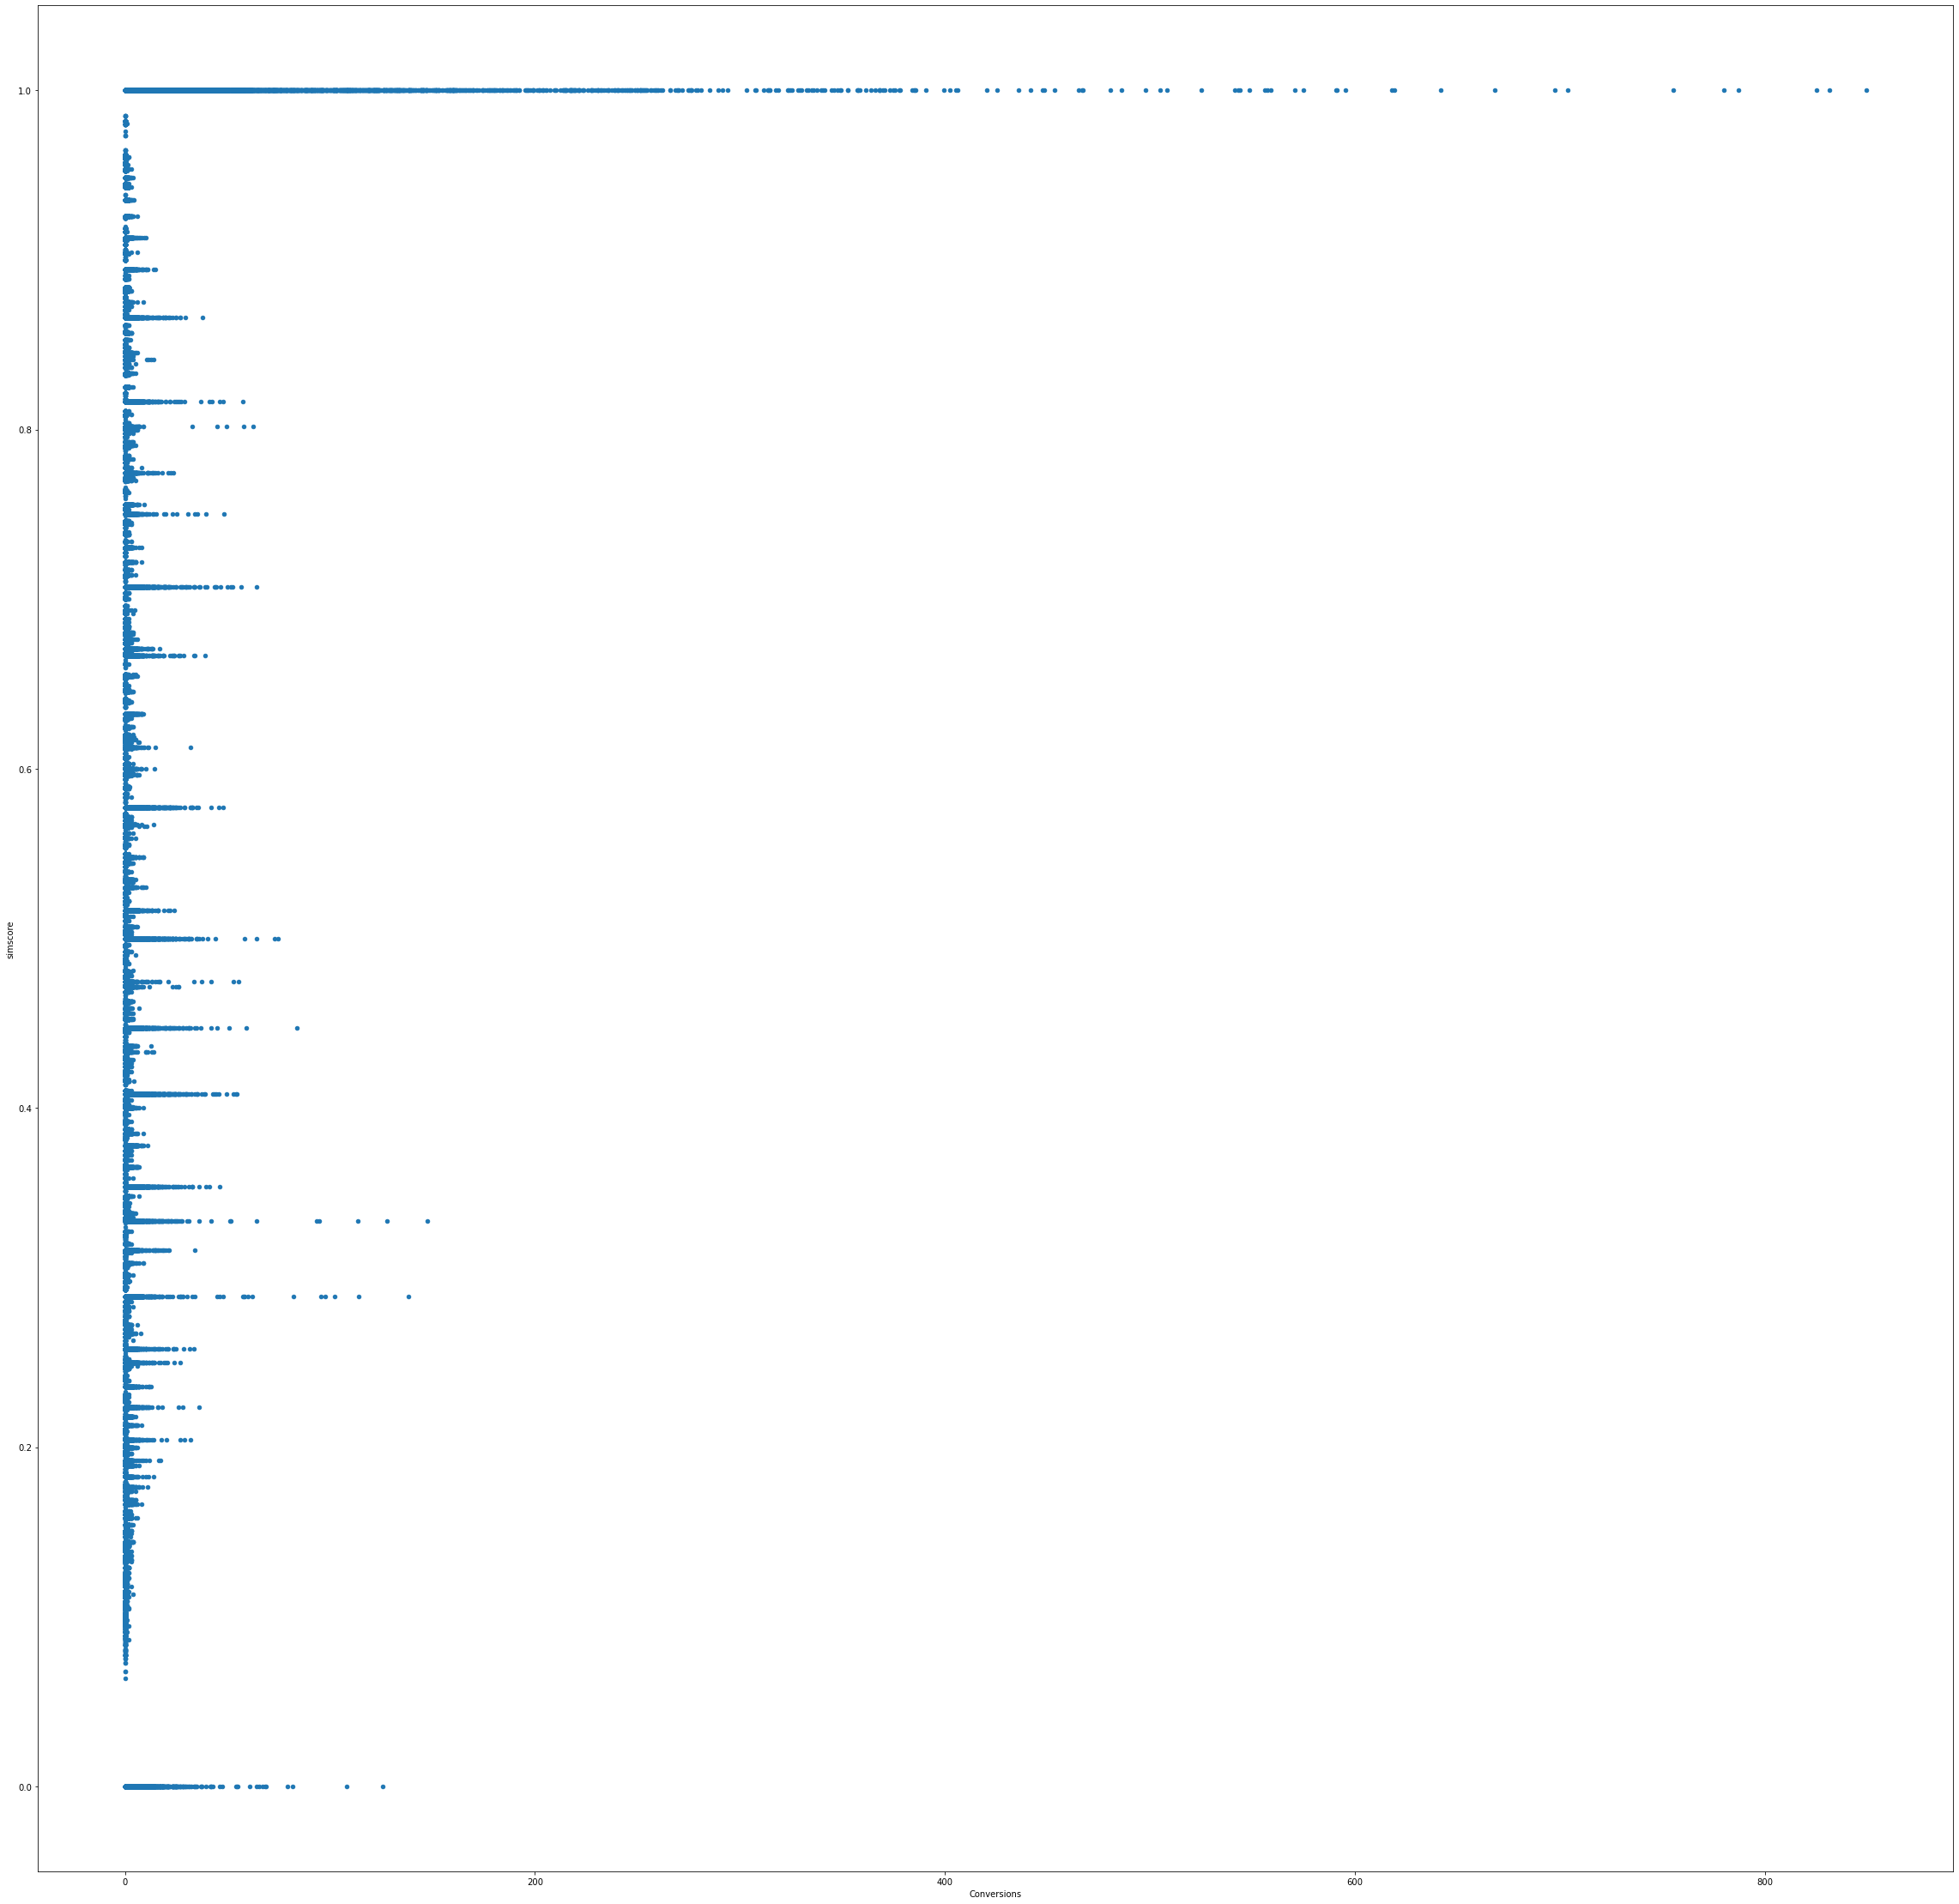

In [45]:
data.plot.scatter(x='Conversions',y='simscore',colormap='viridis',figsize=(40,40))

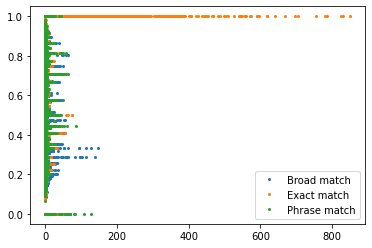

In [46]:
import matplotlib.pyplot as plt

groups = data.groupby('Search keyword match type')
for name, group in groups:
    plt.plot(group.Conversions, group.simscore, marker='o', linestyle='', markersize=2, label=name)
plt.legend()

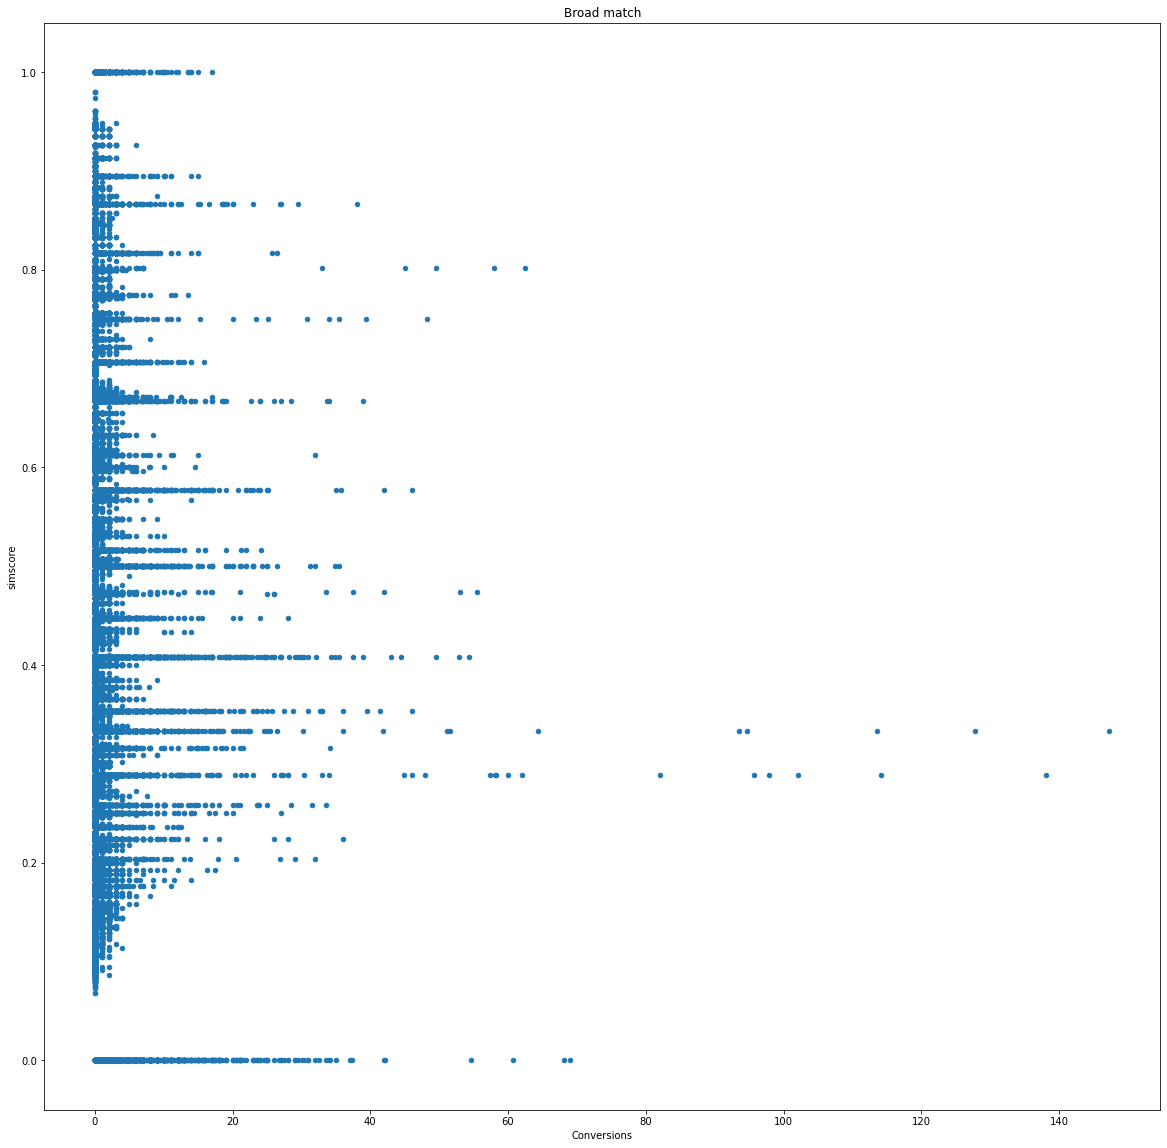

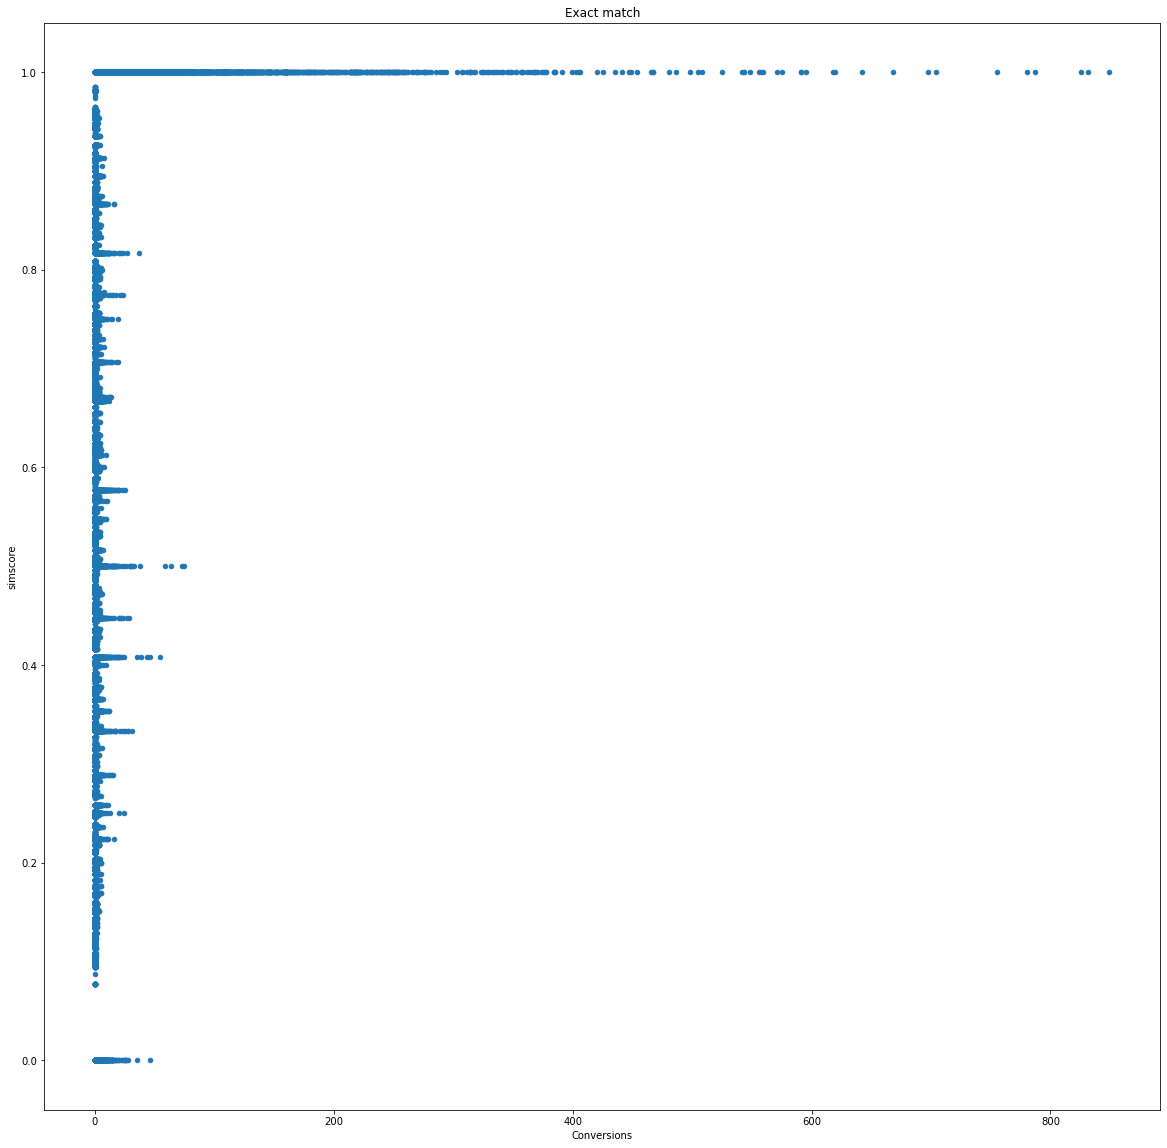

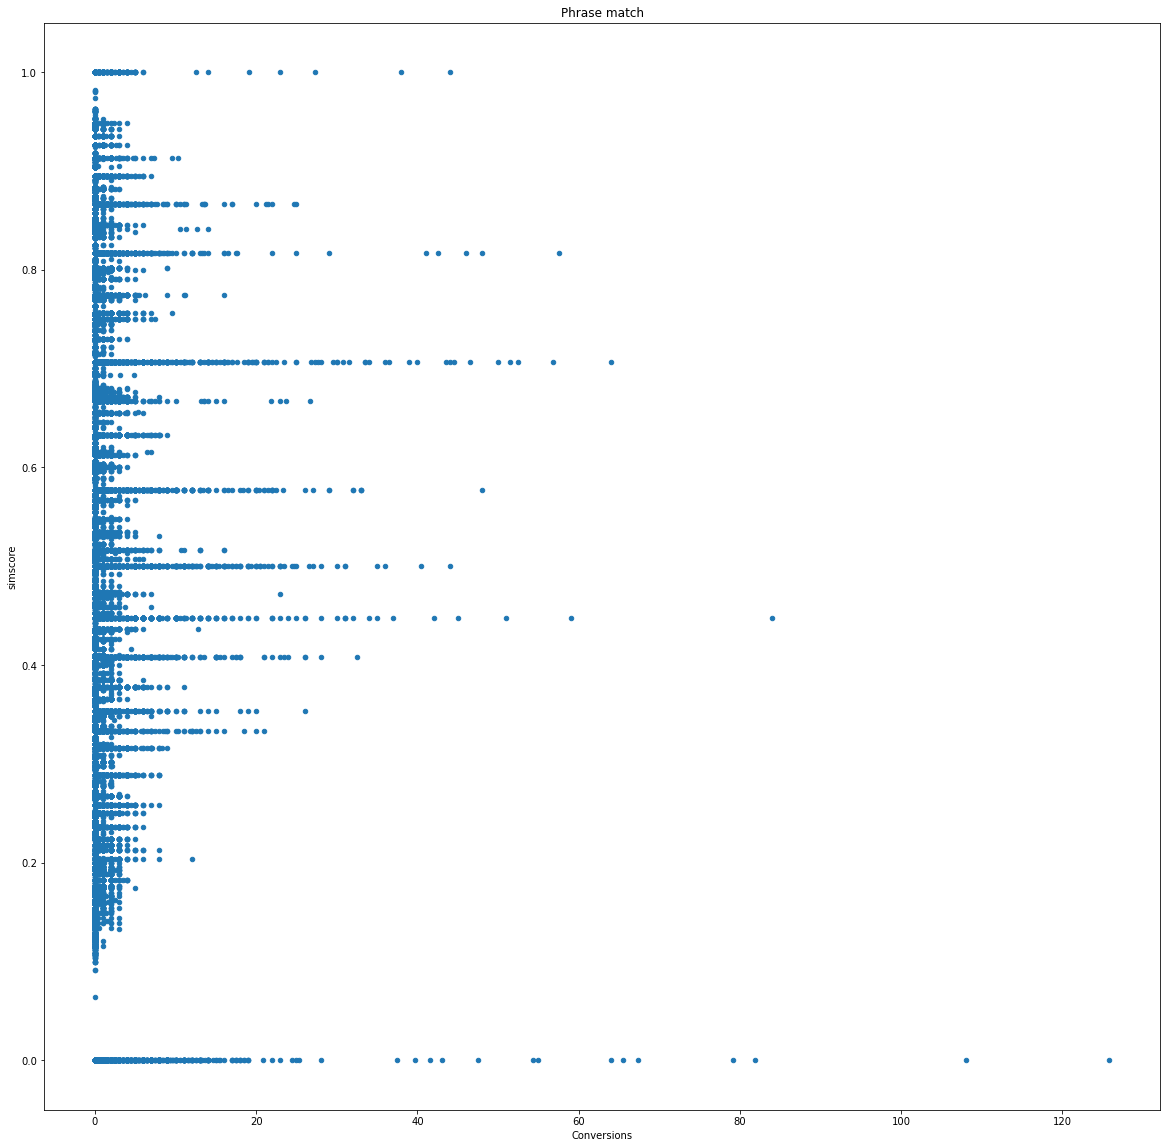

In [47]:
for name, group in groups:
    # print(name)
    group.plot.scatter(x='Conversions',y='simscore',colormap='viridis',figsize=(20,20),title=name)